In [1]:
import torch.nn.functional as F
import torch
from torch import nn
from torchvision import models
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

from numpy import asarray
from numpy import savetxt
from numpy import loadtxt

from google.colab import files

RESNET CIFAR10

In [2]:
class ResnetLambdaLayer(nn.Module):
    def __init__(self, lambd):
        super(ResnetLambdaLayer, self).__init__()
        self.lambd = lambd

    def forward(self, x):
        return self.lambd(x)


class ResnetBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1, option='A'):
        super(ResnetBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu1 = nn.ReLU(inplace=False)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = None
        if stride != 1 or in_planes != planes:
            if option == 'A':
                """
                For CIFAR10 ResNet paper uses option A.
                Increses dimension via padding, performs identity operations
                """
                self.shortcut = ResnetLambdaLayer(lambda x:
                                                  F.pad(x[:, :, ::2, ::2], (0, 0, 0, 0, planes // 4, planes // 4),
                                                        "constant",
                                                        0))
            elif option == 'B':
                self.shortcut = nn.Sequential(
                    nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                    nn.BatchNorm2d(self.expansion * planes)
                )

        self.relu2 = nn.ReLU(inplace=False)

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.conv2(out)
        out = self.bn2(out)

        if self.shortcut is not None:
            identity = self.shortcut(x)

        out += identity
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10, option="A"):
        super(ResNet, self).__init__()
        self.in_planes = 16

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=False)
        self.layer1 = self._make_layer(block, 16, num_blocks[0], stride=1, option=option)
        self.layer2 = self._make_layer(block, 32, num_blocks[1], stride=2, option=option)
        self.layer3 = self._make_layer(block, 64, num_blocks[2], stride=2, option=option)
        self.linear = nn.Linear(64, num_classes)

    # self.apply(_weights_init)

    def _make_layer(self, block, planes, num_blocks, stride, option):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride, option))
            self.in_planes = planes * block.expansion

        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        pool_size = int(out.size(3))
        out = F.avg_pool2d(out, pool_size)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def resnet32(option="A"):
    return ResNet(ResnetBlock, [5, 5, 5], option=option)



Initial version

Files already downloaded and verified
Epoch [1/350], Step [100/500] Loss: 1.9475
Epoch [1/350], Step [200/500] Loss: 1.7335
Epoch [1/350], Step [300/500] Loss: 1.7672
Epoch [1/350], Step [400/500] Loss: 1.5377
Epoch [1/350], Step [500/500] Loss: 1.3701
Epoch [2/350], Step [100/500] Loss: 1.4991
Epoch [2/350], Step [200/500] Loss: 1.1858
Epoch [2/350], Step [300/500] Loss: 1.3080
Epoch [2/350], Step [400/500] Loss: 1.2408
Epoch [2/350], Step [500/500] Loss: 1.1865
Epoch [3/350], Step [100/500] Loss: 1.0256
Epoch [3/350], Step [200/500] Loss: 0.8647
Epoch [3/350], Step [300/500] Loss: 0.9401
Epoch [3/350], Step [400/500] Loss: 0.9683
Epoch [3/350], Step [500/500] Loss: 0.9408
Epoch [4/350], Step [100/500] Loss: 0.7258
Epoch [4/350], Step [200/500] Loss: 0.9507
Epoch [4/350], Step [300/500] Loss: 0.5830
Epoch [4/350], Step [400/500] Loss: 0.8383
Epoch [4/350], Step [500/500] Loss: 0.8406
Epoch [5/350], Step [100/500] Loss: 0.8392
Epoch [5/350], Step [200/500] Loss: 0.5993
Epoch [5/350], S

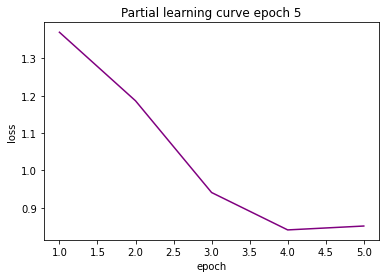

Epoch [6/350], Step [100/500] Loss: 0.6927
Epoch [6/350], Step [200/500] Loss: 0.5776
Epoch [6/350], Step [300/500] Loss: 0.8274
Epoch [6/350], Step [400/500] Loss: 0.6616
Epoch [6/350], Step [500/500] Loss: 0.6093
Epoch [7/350], Step [100/500] Loss: 0.5421
Epoch [7/350], Step [200/500] Loss: 0.5141
Epoch [7/350], Step [300/500] Loss: 0.7401
Epoch [7/350], Step [400/500] Loss: 0.6808
Epoch [7/350], Step [500/500] Loss: 0.6946
Epoch [8/350], Step [100/500] Loss: 0.6630
Epoch [8/350], Step [200/500] Loss: 0.6392
Epoch [8/350], Step [300/500] Loss: 0.5030
Epoch [8/350], Step [400/500] Loss: 0.5897
Epoch [8/350], Step [500/500] Loss: 0.8646
Epoch [9/350], Step [100/500] Loss: 0.7218
Epoch [9/350], Step [200/500] Loss: 0.6815
Epoch [9/350], Step [300/500] Loss: 0.6002
Epoch [9/350], Step [400/500] Loss: 0.6647
Epoch [9/350], Step [500/500] Loss: 0.6121
Epoch [10/350], Step [100/500] Loss: 0.6366
Epoch [10/350], Step [200/500] Loss: 0.6989
Epoch [10/350], Step [300/500] Loss: 0.6623
Epoch [1

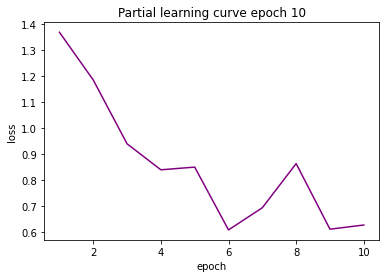

Epoch [11/350], Step [100/500] Loss: 0.6073
Epoch [11/350], Step [200/500] Loss: 0.5832
Epoch [11/350], Step [300/500] Loss: 0.6706
Epoch [11/350], Step [400/500] Loss: 0.4234
Epoch [11/350], Step [500/500] Loss: 0.4115
Epoch [12/350], Step [100/500] Loss: 0.5602
Epoch [12/350], Step [200/500] Loss: 0.6270
Epoch [12/350], Step [300/500] Loss: 0.4536
Epoch [12/350], Step [400/500] Loss: 0.5275
Epoch [12/350], Step [500/500] Loss: 0.4670
Epoch [13/350], Step [100/500] Loss: 0.3943
Epoch [13/350], Step [200/500] Loss: 0.5346
Epoch [13/350], Step [300/500] Loss: 0.4092
Epoch [13/350], Step [400/500] Loss: 0.6857
Epoch [13/350], Step [500/500] Loss: 0.7198
Epoch [14/350], Step [100/500] Loss: 0.7298
Epoch [14/350], Step [200/500] Loss: 0.5517
Epoch [14/350], Step [300/500] Loss: 0.5250
Epoch [14/350], Step [400/500] Loss: 0.6193
Epoch [14/350], Step [500/500] Loss: 0.3279
Epoch [15/350], Step [100/500] Loss: 0.6372
Epoch [15/350], Step [200/500] Loss: 0.5955
Epoch [15/350], Step [300/500] L

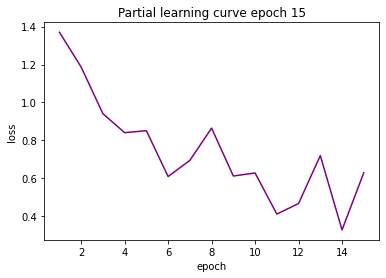

Epoch [16/350], Step [100/500] Loss: 0.5543
Epoch [16/350], Step [200/500] Loss: 0.5429
Epoch [16/350], Step [300/500] Loss: 0.4979
Epoch [16/350], Step [400/500] Loss: 0.4479
Epoch [16/350], Step [500/500] Loss: 0.5439
Epoch [17/350], Step [100/500] Loss: 0.5924
Epoch [17/350], Step [200/500] Loss: 0.4313
Epoch [17/350], Step [300/500] Loss: 0.4377
Epoch [17/350], Step [400/500] Loss: 0.3854
Epoch [17/350], Step [500/500] Loss: 0.4630
Epoch [18/350], Step [100/500] Loss: 0.5025
Epoch [18/350], Step [200/500] Loss: 0.6396
Epoch [18/350], Step [300/500] Loss: 0.6290
Epoch [18/350], Step [400/500] Loss: 0.3897
Epoch [18/350], Step [500/500] Loss: 0.6485
Epoch [19/350], Step [100/500] Loss: 0.6019
Epoch [19/350], Step [200/500] Loss: 0.5437
Epoch [19/350], Step [300/500] Loss: 0.5874
Epoch [19/350], Step [400/500] Loss: 0.5474
Epoch [19/350], Step [500/500] Loss: 0.4645
Epoch [20/350], Step [100/500] Loss: 0.4242
Epoch [20/350], Step [200/500] Loss: 0.6068
Epoch [20/350], Step [300/500] L

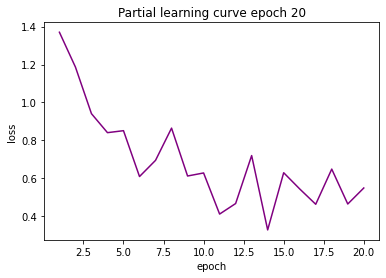

Epoch [21/350], Step [100/500] Loss: 0.4608
Epoch [21/350], Step [200/500] Loss: 0.4765
Epoch [21/350], Step [300/500] Loss: 0.6396
Epoch [21/350], Step [400/500] Loss: 0.3567
Epoch [21/350], Step [500/500] Loss: 0.3388
Epoch [22/350], Step [100/500] Loss: 0.4820
Epoch [22/350], Step [200/500] Loss: 0.5232
Epoch [22/350], Step [300/500] Loss: 0.5284
Epoch [22/350], Step [400/500] Loss: 0.4854
Epoch [22/350], Step [500/500] Loss: 0.4986
Epoch [23/350], Step [100/500] Loss: 0.4337
Epoch [23/350], Step [200/500] Loss: 0.5469
Epoch [23/350], Step [300/500] Loss: 0.5573
Epoch [23/350], Step [400/500] Loss: 0.5253
Epoch [23/350], Step [500/500] Loss: 0.4606
Epoch [24/350], Step [100/500] Loss: 0.6175
Epoch [24/350], Step [200/500] Loss: 0.4466
Epoch [24/350], Step [300/500] Loss: 0.4884
Epoch [24/350], Step [400/500] Loss: 0.4411
Epoch [24/350], Step [500/500] Loss: 0.6401
Epoch [25/350], Step [100/500] Loss: 0.6698
Epoch [25/350], Step [200/500] Loss: 0.4134
Epoch [25/350], Step [300/500] L

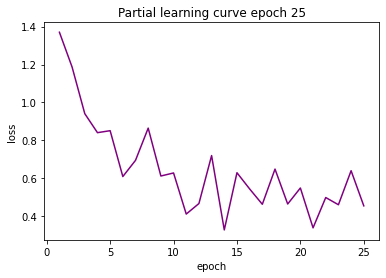

Epoch [26/350], Step [100/500] Loss: 0.4289
Epoch [26/350], Step [200/500] Loss: 0.5051
Epoch [26/350], Step [300/500] Loss: 0.5239
Epoch [26/350], Step [400/500] Loss: 0.4100
Epoch [26/350], Step [500/500] Loss: 0.3875
Epoch [27/350], Step [100/500] Loss: 0.3068
Epoch [27/350], Step [200/500] Loss: 0.4039
Epoch [27/350], Step [300/500] Loss: 0.7587
Epoch [27/350], Step [400/500] Loss: 0.5152
Epoch [27/350], Step [500/500] Loss: 0.5963
Epoch [28/350], Step [100/500] Loss: 0.5666
Epoch [28/350], Step [200/500] Loss: 0.5656
Epoch [28/350], Step [300/500] Loss: 0.3865


In [ ]:
# For updating learning rate
def update_lr(optimizer, lr):    
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

# Image preprocessing modules
transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])

# CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                            train=True, 
                                            transform=transform,
                                            download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                            train=False, 
                                            transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=100, 
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=100, 
                                          shuffle=False)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 350
learning_rate = 0.1
momentum_val = 0.9
wd=0.0005

#Model
model = resnet32().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum = momentum_val, weight_decay = wd)

# Train the model
total_step = len(train_loader)
curr_lr = learning_rate
loss_array = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
    loss_array.append(loss.item())

    # Decay learning rate
    if (epoch+1) == 150 or (epoch+1) == 250:
        curr_lr /= 10
        update_lr(optimizer, curr_lr)

    #Checkpoint every 50 epochs
    if (epoch+1) % 5 == 0:
        #save checkpoints
        filename = 'checkpoint_' + str(epoch+1) + '.tar'
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, filename)
        #files.download(filename)
        #partial learning curve
        i = np.arange(1, len(loss_array)+1)
        plt.plot(i,loss_array,'purple')
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.title("Partial learning curve epoch " + str(epoch+1))
        plt.show()
        #save loss array in csv file
        data = asarray([loss_array])
        filename_loss = 'loss_array_' + str(epoch+1) + '.csv'
        savetxt(filename_loss, data, delimiter=',')


Loading from checkpoint version

Files already downloaded and verified
Epoch [16/350], Step [100/500] Loss: 0.7179
Epoch [16/350], Step [200/500] Loss: 0.3678
Epoch [16/350], Step [300/500] Loss: 0.4792
Epoch [16/350], Step [400/500] Loss: 0.5092
Epoch [16/350], Step [500/500] Loss: 0.4998


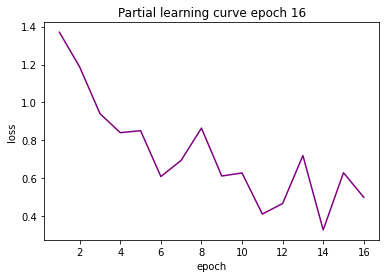

Epoch [17/350], Step [100/500] Loss: 0.4849
Epoch [17/350], Step [200/500] Loss: 0.5725
Epoch [17/350], Step [300/500] Loss: 0.5072
Epoch [17/350], Step [400/500] Loss: 0.3786
Epoch [17/350], Step [500/500] Loss: 0.5267
Epoch [18/350], Step [100/500] Loss: 0.6364
Epoch [18/350], Step [200/500] Loss: 0.4722
Epoch [18/350], Step [300/500] Loss: 0.4019
Epoch [18/350], Step [400/500] Loss: 0.5272
Epoch [18/350], Step [500/500] Loss: 0.6341
Epoch [19/350], Step [100/500] Loss: 0.4126
Epoch [19/350], Step [200/500] Loss: 0.4430
Epoch [19/350], Step [300/500] Loss: 0.5775
Epoch [19/350], Step [400/500] Loss: 0.3829
Epoch [19/350], Step [500/500] Loss: 0.5694
Epoch [20/350], Step [100/500] Loss: 0.5848
Epoch [20/350], Step [200/500] Loss: 0.4377
Epoch [20/350], Step [300/500] Loss: 0.5636
Epoch [20/350], Step [400/500] Loss: 0.8781
Epoch [20/350], Step [500/500] Loss: 0.4855


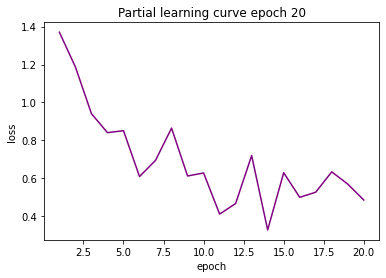

Epoch [21/350], Step [100/500] Loss: 0.5114
Epoch [21/350], Step [200/500] Loss: 0.3872
Epoch [21/350], Step [300/500] Loss: 0.6457
Epoch [21/350], Step [400/500] Loss: 0.5300
Epoch [21/350], Step [500/500] Loss: 0.5098
Epoch [22/350], Step [100/500] Loss: 0.2897
Epoch [22/350], Step [200/500] Loss: 0.3976
Epoch [22/350], Step [300/500] Loss: 0.4035
Epoch [22/350], Step [400/500] Loss: 0.5641
Epoch [22/350], Step [500/500] Loss: 0.4561
Epoch [23/350], Step [100/500] Loss: 0.5817
Epoch [23/350], Step [200/500] Loss: 0.3734
Epoch [23/350], Step [300/500] Loss: 0.5529
Epoch [23/350], Step [400/500] Loss: 0.4590
Epoch [23/350], Step [500/500] Loss: 0.3239
Epoch [24/350], Step [100/500] Loss: 0.4317
Epoch [24/350], Step [200/500] Loss: 0.6465
Epoch [24/350], Step [300/500] Loss: 0.5659
Epoch [24/350], Step [400/500] Loss: 0.5147
Epoch [24/350], Step [500/500] Loss: 0.3997
Epoch [25/350], Step [100/500] Loss: 0.4688
Epoch [25/350], Step [200/500] Loss: 0.4790
Epoch [25/350], Step [300/500] L

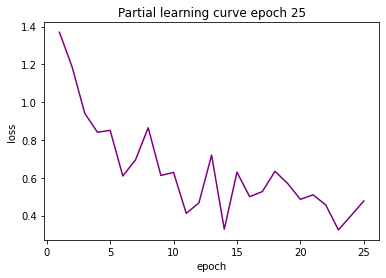

Epoch [26/350], Step [100/500] Loss: 0.4326
Epoch [26/350], Step [200/500] Loss: 0.5083
Epoch [26/350], Step [300/500] Loss: 0.5327
Epoch [26/350], Step [400/500] Loss: 0.3923
Epoch [26/350], Step [500/500] Loss: 0.4744
Epoch [27/350], Step [100/500] Loss: 0.6380
Epoch [27/350], Step [200/500] Loss: 0.5080
Epoch [27/350], Step [300/500] Loss: 0.5549
Epoch [27/350], Step [400/500] Loss: 0.5925
Epoch [27/350], Step [500/500] Loss: 0.4595
Epoch [28/350], Step [100/500] Loss: 0.5665
Epoch [28/350], Step [200/500] Loss: 0.5564
Epoch [28/350], Step [300/500] Loss: 0.5004
Epoch [28/350], Step [400/500] Loss: 0.5465
Epoch [28/350], Step [500/500] Loss: 0.4213
Epoch [29/350], Step [100/500] Loss: 0.3945
Epoch [29/350], Step [200/500] Loss: 0.5986
Epoch [29/350], Step [300/500] Loss: 0.6238
Epoch [29/350], Step [400/500] Loss: 0.4617
Epoch [29/350], Step [500/500] Loss: 0.3529
Epoch [30/350], Step [100/500] Loss: 0.5579
Epoch [30/350], Step [200/500] Loss: 0.6738
Epoch [30/350], Step [300/500] L

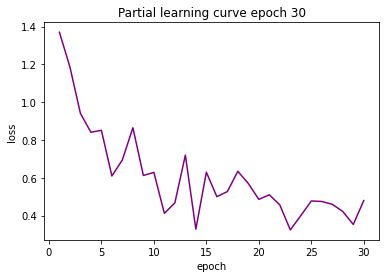

Epoch [31/350], Step [100/500] Loss: 0.4739
Epoch [31/350], Step [200/500] Loss: 0.4322
Epoch [31/350], Step [300/500] Loss: 0.5640
Epoch [31/350], Step [400/500] Loss: 0.4546
Epoch [31/350], Step [500/500] Loss: 0.3607
Epoch [32/350], Step [100/500] Loss: 0.5270
Epoch [32/350], Step [200/500] Loss: 0.4217
Epoch [32/350], Step [300/500] Loss: 0.3221
Epoch [32/350], Step [400/500] Loss: 0.5485
Epoch [32/350], Step [500/500] Loss: 0.3244
Epoch [33/350], Step [100/500] Loss: 0.5628
Epoch [33/350], Step [200/500] Loss: 0.5247
Epoch [33/350], Step [300/500] Loss: 0.3724
Epoch [33/350], Step [400/500] Loss: 0.5317
Epoch [33/350], Step [500/500] Loss: 0.6422
Epoch [34/350], Step [100/500] Loss: 0.3810
Epoch [34/350], Step [200/500] Loss: 0.3685
Epoch [34/350], Step [300/500] Loss: 0.3761
Epoch [34/350], Step [400/500] Loss: 0.5601
Epoch [34/350], Step [500/500] Loss: 0.4858
Epoch [35/350], Step [100/500] Loss: 0.3729
Epoch [35/350], Step [200/500] Loss: 0.4564
Epoch [35/350], Step [300/500] L

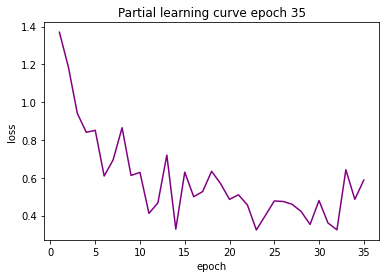

Epoch [36/350], Step [100/500] Loss: 0.4710
Epoch [36/350], Step [200/500] Loss: 0.4464
Epoch [36/350], Step [300/500] Loss: 0.3281
Epoch [36/350], Step [400/500] Loss: 0.6066
Epoch [36/350], Step [500/500] Loss: 0.3866
Epoch [37/350], Step [100/500] Loss: 0.4642
Epoch [37/350], Step [200/500] Loss: 0.4774
Epoch [37/350], Step [300/500] Loss: 0.5414
Epoch [37/350], Step [400/500] Loss: 0.3639
Epoch [37/350], Step [500/500] Loss: 0.4272
Epoch [38/350], Step [100/500] Loss: 0.4953
Epoch [38/350], Step [200/500] Loss: 0.4916
Epoch [38/350], Step [300/500] Loss: 0.5626
Epoch [38/350], Step [400/500] Loss: 0.6624
Epoch [38/350], Step [500/500] Loss: 0.3926
Epoch [39/350], Step [100/500] Loss: 0.3911
Epoch [39/350], Step [200/500] Loss: 0.6649
Epoch [39/350], Step [300/500] Loss: 0.3518
Epoch [39/350], Step [400/500] Loss: 0.4815
Epoch [39/350], Step [500/500] Loss: 0.4243
Epoch [40/350], Step [100/500] Loss: 0.4053
Epoch [40/350], Step [200/500] Loss: 0.5434
Epoch [40/350], Step [300/500] L

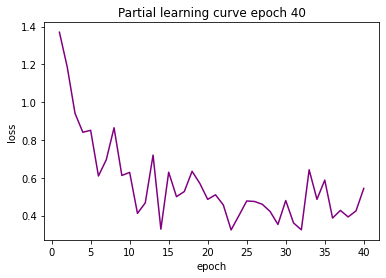

Epoch [41/350], Step [100/500] Loss: 0.4751
Epoch [41/350], Step [200/500] Loss: 0.5209
Epoch [41/350], Step [300/500] Loss: 0.5032
Epoch [41/350], Step [400/500] Loss: 0.5805
Epoch [41/350], Step [500/500] Loss: 0.6607
Epoch [42/350], Step [100/500] Loss: 0.4912
Epoch [42/350], Step [200/500] Loss: 0.6081
Epoch [42/350], Step [300/500] Loss: 0.5270
Epoch [42/350], Step [400/500] Loss: 0.4306
Epoch [42/350], Step [500/500] Loss: 0.5519
Epoch [43/350], Step [100/500] Loss: 0.3644
Epoch [43/350], Step [200/500] Loss: 0.5081
Epoch [43/350], Step [300/500] Loss: 0.3869
Epoch [43/350], Step [400/500] Loss: 0.4840
Epoch [43/350], Step [500/500] Loss: 0.4975
Epoch [44/350], Step [100/500] Loss: 0.3204
Epoch [44/350], Step [200/500] Loss: 0.4545
Epoch [44/350], Step [300/500] Loss: 0.3633
Epoch [44/350], Step [400/500] Loss: 0.4337
Epoch [44/350], Step [500/500] Loss: 0.3915
Epoch [45/350], Step [100/500] Loss: 0.4432
Epoch [45/350], Step [200/500] Loss: 0.3437
Epoch [45/350], Step [300/500] L

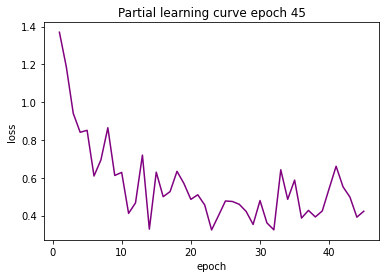

Epoch [46/350], Step [100/500] Loss: 0.4352
Epoch [46/350], Step [200/500] Loss: 0.4014
Epoch [46/350], Step [300/500] Loss: 0.4097
Epoch [46/350], Step [400/500] Loss: 0.4981
Epoch [46/350], Step [500/500] Loss: 0.6861
Epoch [47/350], Step [100/500] Loss: 0.2717
Epoch [47/350], Step [200/500] Loss: 0.4149
Epoch [47/350], Step [300/500] Loss: 0.3332
Epoch [47/350], Step [400/500] Loss: 0.5211


In [ ]:
# For updating learning rate
def update_lr(optimizer, lr):    
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

# Image preprocessing modules
transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])

# CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                            train=True, 
                                            transform=transform,
                                            download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                            train=False, 
                                            transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=100, 
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=100, 
                                          shuffle=False)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 350
learning_rate = 0.1
momentum_val = 0.9
wd=0.0005

#checkpoint
checkpoint = torch.load('/content/drive/MyDrive/Colab Notebooks/checkpoint_15.pth')

#Model
model = resnet32().to(device)
model.load_state_dict(checkpoint['model_state_dict'])

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum = momentum_val, weight_decay = wd)
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
curr_epoch = checkpoint['epoch'] +1

# Train the model
total_step = len(train_loader)
curr_lr = learning_rate
loss_ndarray = loadtxt('/content/drive/MyDrive/Colab Notebooks/loss_array_'+ str(curr_epoch) +'.csv', delimiter=',')
loss_array = loss_ndarray.tolist()
for epoch in range(curr_epoch, num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
    loss_array.append(loss.item())

    # Decay learning rate
    if (epoch+1) == 150 or (epoch+1) == 250:
        curr_lr /= 10
        update_lr(optimizer, curr_lr)

    #Checkpoint every 50 epochs
    if (epoch+1) % 5 == 0 or epoch == 15:
        #save checkpoints
        filename = '/content/drive/MyDrive/Colab Notebooks/checkpoint_' + str(epoch+1) + '.tar'
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, filename)
        #files.download(filename)
        #partial learning curve
        i = np.arange(1, len(loss_array)+1)
        plt.plot(i,loss_array,'purple')
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.title("Partial learning curve epoch " + str(epoch+1))
        plt.show()
        #save loss array in csv file
        data = asarray([loss_array])
        filename_loss = '/content/drive/MyDrive/Colab Notebooks/loss_array_' + str(epoch+1) + '.csv'
        savetxt(filename_loss, data, delimiter=',')


Learning curve

In [ ]:
# Print learning curve epoch/loss
import numpy as np
import matplotlib.pyplot as plt

i = np.arange(1, len(loss_array)+1)
plt.plot(i,loss_array,'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.title("")
plt.show()

In [ ]:
# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'prova.ckpt')



Accuracy of the model on the test images: 42.02 %
